# Part 1

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Perfect sensor
def sense(x):
    return x

In [4]:
def simulate(Δt, x, u):
    # The control input is equal to the velocity of the robot
    dx = array(u)
    
    # Euler integration
    x += Δt * dx
    return x

## Problem 1, Exercise 5 of Chapter 2

In [5]:
def control(t, y):
    ### u(t) = K(pd − p(t))
    d = array([3., 3.])
    ux = (d[0] - y[0])
    uy = (d[1] - y[1])
    return array([ux, uy])

In [6]:
tf = 15.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1., 2.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

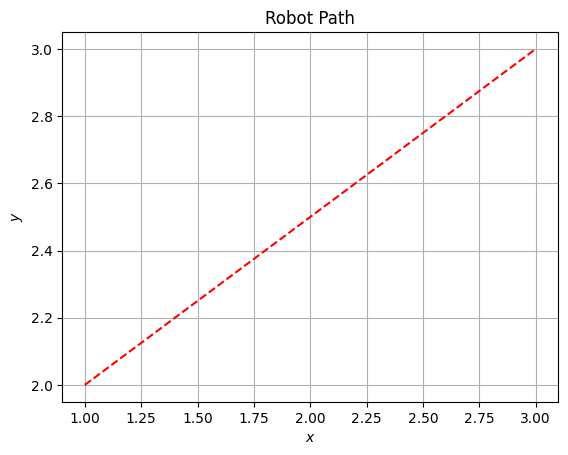

In [7]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$y$")
ax.grid()

## Problem 2, Exercise 6 of Chapter 2

In [8]:
def control2(t, y):
    ### u(t) = K(pd − p(t))
    ds = [array([-2.75, 2.75]), array([3., -2.6]), array([2.8, 2.95]), array([0., 0.])]
    cnt = 0
    if t < 5:
        cnt = 0
    elif t < 10:
        cnt = 1
    elif t < 15:
        cnt = 2
    else:
        cnt = 3
    d = ds[cnt]
    ux = (d[0] - y[0])
    uy = (d[1] - y[1])
    return array([ux, uy])

In [9]:
tf = 20.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x2 = array([-3., -3.])
x2_log = [copy(x2)]
ds = [array([-2.75, 2.75]), array([3., -2.6]), array([2.8, 2.95]), array([0., 0.])]
cnt = 0

for t in time:
    y = sense(x2)
    u = control2(t, y,)    
    x2 = simulate(Δt, x2, u)
    x2_log.append(copy(x2))
    
x2_log = array(x2_log)

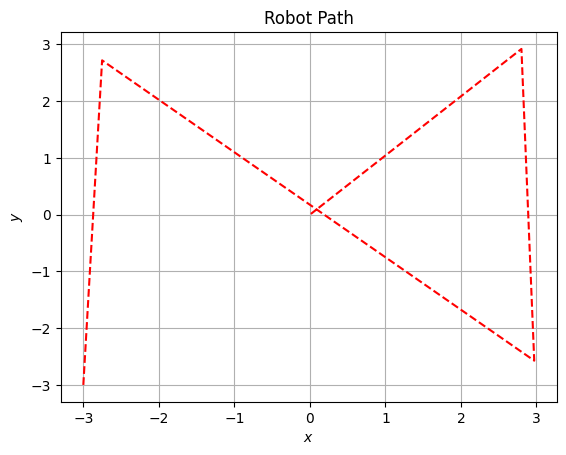

In [10]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x2_log[:,0], x2_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$y$")
ax.grid()